In [ ]:
!pip install pcntoolkit

## CPC TUTORIAL ON NORMATIVE MODELING

**Background Story**

Morten and Ingrid are concerned about the health of their father, Nordan. He recently turned 65 years. A few months ago he could not find his way home anymore. Together, they visit a neurologist/psychiatrist to conduct a number of cognitive tests. However, those tests were inconclusive. While Nordan has a relatively low IQ it could not explain his trouble returning home.

Recently, the family heard about a new screening technique called normative modeling with which one can place individuals in reference to a population norm on for instance measures such as brain volume. Nordan would like to undertake this procedure to better know what is going on and to potentially find targets for treatment. Therefore, the family booked an appointment with you, the normative modeling specialist. To find out what is going on you compare Nordan's hyppocampus to the norm and to a group of persons with Alzheimers disease, who have a similar IQ, age as well as the same sex as Nordan.

_______________________________________________________________________________

**TASK 1:** You have four files. The features and demographics file for the normsample and two files of the same name for Nordan your test sample. As one of your coworkers has done the preporcessing and quality control there are more subjects in the demographics file than in the features file of the norm sample. Please select the overlap of participants between those two files. 


*Question for your understanding:*

1) Why do we have to select the overlap between participants in terms of featrues and demographics?

In [ ]:
import pandas as pd

# read in the files.
norm_demographics = pd.read_csv('cpc_camcan_demographics.csv',
                                sep= ",",
                                index_col = 0)
norm_features = pd.read_csv('cpc_camcan_features.csv',
                            sep=",",
                            index_col = 0)

# check columns through print [there are other better options]
print(norm_demographics)
print(norm_features)

# find overlap in terms of participants between norm_sample_features and 
# norm_sample_demographics

norm_demographics_features = pd.concat([norm_demographics, norm_features],
                                       axis = 1,
                                       join = 'inner') # inner checks overlap
                                                       # outer combines
print(norm_demographics_features)




             age sex_name  sex  IQ_random
paricipants                              
CC110033      24     MALE    1         73
CC110037      18     MALE    1        103
CC110045      24   FEMALE    2        124
CC110056      22   FEMALE    2        124
CC110062      20     MALE    1        126
...          ...      ...  ...        ...
CC722542      79     MALE    1        116
CC722651      79   FEMALE    2        128
CC722891      84   FEMALE    2        129
CC723197      80   FEMALE    2         96
CC723395      86   FEMALE    2        145

[707 rows x 4 columns]
              left_Hippocampal_tail  ...  right_Whole_hippocampus
participants                         ...                         
CC110033                 482.768229  ...              3531.764896
CC110037                 595.269259  ...              3835.426137
CC110045                 655.847194  ...              3681.494304
CC110056                 561.345626  ...              3461.373764
CC110062                 756.52116

**TASK 2:** Prepare the covariate_normsample and testresponse_normsample file. As mentioned in the introductory presentation those files need a specific format and the entries need to be seperated by spaces. Use whatever method you know to prepare those files based on the data provided in TASK 1. Save those files in .txt format in your drive. Also get rid of the column names and participant IDs.

Given that we only have limited time in this practical we have to make a selection for the features based on your prior knowledge. With the information in mind that Nordan does not remember his way home, which subfield of the hyppocampus is probably a good target for the investigations?
Select a maximum of four hyppocampal regions as features.

NOTE: Normative modeling is a screening tool we just make this selection due to time constraints, in reality we build these models on millions of putative biomarkers that are not restricted to brain imaging.


*Qestions for your understanding:*

2) What is the requirement for the features in terms of variable properties (e.g. dicotomous or continous)? 3) What is the requirement for the covariates in terms of these properties? 4) What are the requirements for both together? 5) How does this depent on the algorithm used?

In [ ]:
import pandas as pd

# perpare covariate_normsample for sex and age
covariate_normsample = norm_demographics_features[['sex',
                                                   'age']] 

covariate_normsample.to_csv('covariate_normsample.txt',
                            sep = ' ',
                            header = False, 
                            index = False)

# perpare features_normsample for relevant hyppocampal subfields
features_normsample = norm_demographics_features[['left_CA1', 
                                                 'left_CA3',
                                                 'right_CA1',
                                                 'right_CA3']]

features_normsample.to_csv('features_normsample.txt', 
                           sep = ' ', 
                           header = False, 
                           index = False)

**TASK 3:** Once you have prepared and saved all the necessary files. Look at the pcntoolkit for running normative modeling. Select an appropritate method set up the toolkit and run your analyses using 2-fold cross validation in the normsample. Change the outputsuffix from estimate to '_2fold'. HINT: You primarily need the estimate function. SUGGESTION: While this process is running you can go to the next TASK 4, you will have no doubt when it is correctly running.

*Question for your understaning:*

6) What does cvfolds mean and why do we use it? 7) What is the output of the estimate function?


In [ ]:
import pcntoolkit as pcn

# run normative modeling using 2-fold cross-validation

pcn.normative.estimate(covfile = 'covariate_normsample.txt', 
                       respfile = 'features_normsample.txt',
                       cvfolds = 2,
                       alg = 'gpr',
                       outputsuffix = '_5fold')



Processing data in features_normsample.txt
Estimating model  1 of 4
Optimization terminated successfully.
         Current function value: 415.774285
         Iterations: 54
         Function evaluations: 141
         Gradient evaluations: 141
Estimating model  2 of 4
Optimization terminated successfully.
         Current function value: 437.765686
         Iterations: 21
         Function evaluations: 43
         Gradient evaluations: 43
Estimating model  3 of 4
Optimization terminated successfully.
         Current function value: 412.429592
         Iterations: 21
         Function evaluations: 39
         Gradient evaluations: 39
Estimating model  4 of 4
Optimization terminated successfully.
         Current function value: 438.497028
         Iterations: 22
         Function evaluations: 40
         Gradient evaluations: 40
Estimating model  1 of 4
Optimization terminated successfully.
         Current function value: 440.899976
         Iterations: 15
         Function evaluation

**TASK 4:** In order to visulize the normative trajectories you first need to run the forward model. To this end you need to set up an appropriate covariate_forwardmodel file that covers the age range appropriately for both sexes. Save this file as .txt . Then you can input the files you made in TASK 1 as well as the file you made now and run the forward model using the appropriate specifications.

*Question for your understaning:*

8) What is yhat and ys2? 9) Why does the output of the forward model does not inlcude the Z-scores?


In [ ]:
import pandas as pd 
import pcntoolkit as pcn

# create covariate_forwardmodel.txt file
covariate_forwardmodel = {'sex': [0, 0, 0, 0, 0, 0, 0,
                                  1, 1, 1, 1, 1, 1, 1],
                          'age': [20, 30, 40, 50, 60, 70, 80,
                                  20, 30, 40, 50, 60, 70, 80]}
covariate_forwardmodel = pd.DataFrame(data=covariate_forwardmodel)

covariate_forwardmodel.to_csv('covariate_forwardmodel.txt', 
                           sep = ' ', 
                           header = False, 
                           index = False)

# estimate forward model

pcn.normative.estimate(covfile = 'covariate_normsample.txt', 
                       respfile = 'features_normsample.txt',
                       testcov = 'covariate_forwardmodel.txt',
                       cvfolds = None,
                       alg = 'gpr',
                       outputsuffix = '_forward')


Processing data in features_normsample.txt
Estimating model  1 of 4
Optimization terminated successfully.
         Current function value: 803.831447
         Iterations: 34
         Function evaluations: 84
         Gradient evaluations: 84
Estimating model  2 of 4
Optimization terminated successfully.
         Current function value: 853.732500
         Iterations: 51
         Function evaluations: 106
         Gradient evaluations: 106
Estimating model  3 of 4
Optimization terminated successfully.
         Current function value: 809.035696
         Iterations: 29
         Function evaluations: 78
         Gradient evaluations: 78
Estimating model  4 of 4
Optimization terminated successfully.
         Current function value: 860.288327
         Iterations: 61
         Function evaluations: 140
         Gradient evaluations: 140
Writing outputs ...


**TASK 5:** Implement a function that calculates percentage change. 

Percentage change = $\frac{x1 - x2}{|x2|}*100$

In [ ]:
# function that calculates percentage change
def calculate_percentage_change(x1, x2):
  percentage_change = ((x1 - x2) / abs(x2)) * 100
  return percentage_change

**TASK 6:** Plot the prercentage change in Yhat in reference to age 20. Do that for both sexes seperately.





(-20.0, 2.0)

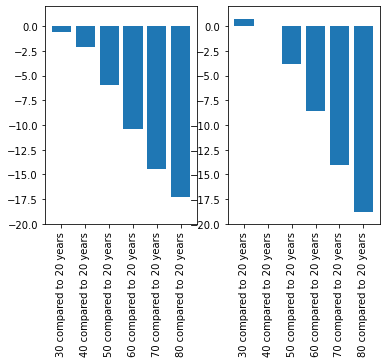

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

forward_yhat = pd.read_csv('yhat_forward.txt', sep = ' ', header=None)

# You can indicate here which hypocampal subfield you like to visualize
hyppocampal_subfield = 0

percentage_change_female = []
percentage_change_male = []
count = 0
lengths = len(forward_yhat[hyppocampal_subfield])
for entry in forward_yhat[hyppocampal_subfield]:
  if count > 0 and count < 7:
    loop_percentage_change_female = calculate_percentage_change(entry, 
                                                                forward_yhat.iloc[0,
                                                                                  hyppocampal_subfield])
    percentage_change_female.append(loop_percentage_change_female)
  elif count > 7: 
    loop_percentage_change_male = calculate_percentage_change(entry,
                                                              forward_yhat.iloc[9,
                                                                                hyppocampal_subfield])
    percentage_change_male.append(loop_percentage_change_male)
  count = count + 1 

names = ['30 compared to 20 years', 
         '40 compared to 20 years', 
         '50 compared to 20 years', 
         '60 compared to 20 years', 
         '70 compared to 20 years',
         '80 compared to 20 years']

# females
plt.subplot(121)
plt.bar(names, percentage_change_female)
plt.xticks(rotation=90)
plt.ylim(-20, 2)

# males
plt.subplot(122)
plt.bar(names, percentage_change_male)
plt.xticks(rotation=90)
plt.ylim(-20, 2)


**TASK 7:** Visualize the forward model of the normative model using yhat, ys2 and Z, similar to this figure. 
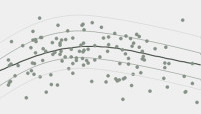

In [ ]:
# MARIAM can you include your code here?

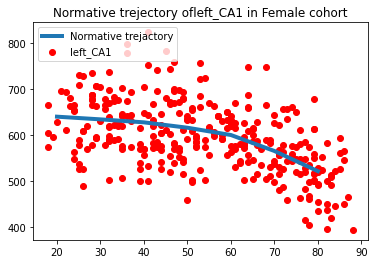

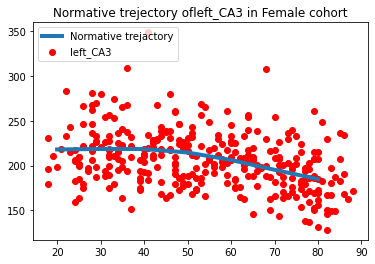

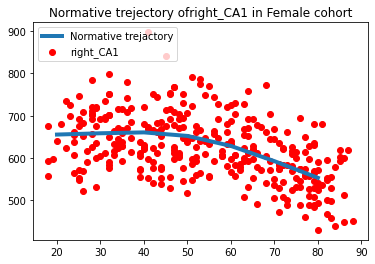

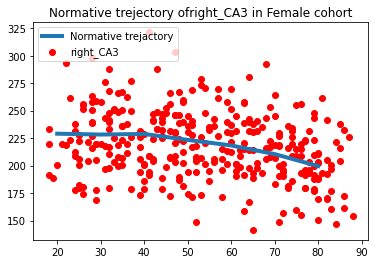

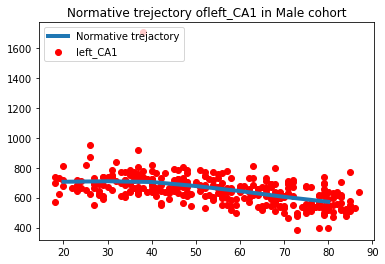

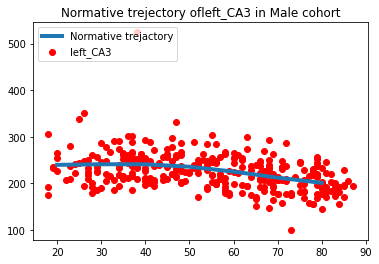

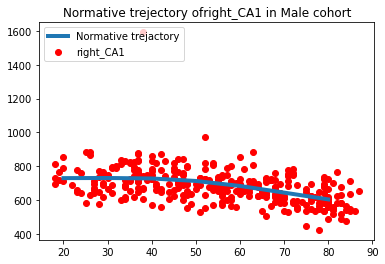

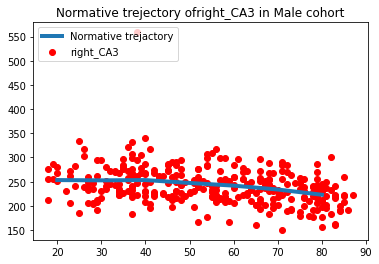

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

feature_names=['left_CA1','left_CA3','right_CA1','right_CA3']
sex_covariates=[ 'Female','Male']
# Creating plots for Female and male 
for i,sex in enumerate(sex_covariates):
# Find the index of the data exclusively for one sex. Female:0, Male: 1   
    inx=np.where(covariate_normsample.sex==i)[0]
    x=covariate_normsample.values[inx,1]
    # actual data
    y = pd.read_csv('features_normsample.txt', sep = ' ', header=None)
    y=y.values[inx]
    #forward model data
    forward_yhat = pd.read_csv('yhat_forward.txt', sep = ' ', header=None)
    yhat_forward=forward_yhat.values
    yhat_forward=yhat_forward[7*i:7*(i+1)]
    x_forward=[20, 30, 40, 50, 60, 70, 80]
# Creat a trejactroy for each feauter point     
    for j,name in enumerate(feature_names):
        fig=plt.figure()
        ax=fig.add_subplot(111)
        ax.plot(x_forward,yhat_forward[:,j], linewidth=4, label='Normative trajectory')  
        ax.scatter(x,y[:,j],c='r', label=name)
        plt.legend(loc='upper left')
        plt.title('Normative trajectory of' +name+' in '+sex+' cohort')
        plt.show()
        plt.close()

**TASK 8:** Apply the normative model to Nordan's data and the DEM patients.

In [ ]:
import pcntoolkit as pcn

# read in Nordan's as well as the patient's demographics and features
demographics_nordan = pd.read_csv('cpc_camcan_demographics_nordan.csv',
                                       sep= ",",
                                       index_col = 0)
features_nordan = pd.read_csv('cpc_camcan_features_nordan.csv',
                            sep=",",
                            index_col = 0)

# create a covariate file for Nordan's as well as the patient's demograhpics
covariate_nordan = demographics_nordan[['sex',
                                        'age']] 
covariate_nordan.to_csv('covariate_nordan.txt',
                        sep = ' ',
                        header = False, 
                        index = False)

# create the corresponding feature file
features_nordan = features_nordan[['left_CA1', 
                                  'left_CA3',
                                  'right_CA1',
                                  'right_CA3']]

features_nordan.to_csv('features_nordan.txt', 
                        sep = ' ', 
                        header = False, 
                        index = False)

# apply normative modeling
pcn.normative.estimate(covfile = 'covariate_normsample.txt', 
                       respfile = 'features_normsample.txt',
                       testcov = 'covariate_nordan.txt',
                       testresp = 'features_nordan.txt',
                       cvfolds = None,
                       alg = 'gpr',
                       outputsuffix = '_nordan')



Processing data in features_normsample.txt
Estimating model  1 of 4
Optimization terminated successfully.
         Current function value: 803.831447
         Iterations: 34
         Function evaluations: 84
         Gradient evaluations: 84
Estimating model  2 of 4
Optimization terminated successfully.
         Current function value: 853.732500
         Iterations: 51
         Function evaluations: 106
         Gradient evaluations: 106
Estimating model  3 of 4
Optimization terminated successfully.
         Current function value: 809.035696
         Iterations: 29
         Function evaluations: 78
         Gradient evaluations: 78
Estimating model  4 of 4
Optimization terminated successfully.
         Current function value: 860.288327
         Iterations: 61
         Function evaluations: 140
         Gradient evaluations: 140
Evaluating the model ...
Writing outputs ...


**TASK 9:** Plot Nordan's deviations in reference to the estimated norm and put this into context with his cognitive performance. 

*Question for your understanding:*

10) In which hyppocampal subfield(s) does Nordan deviate extremely? i) |Z| > 3.6 ii) |Z| > 1.96

In [ ]:
import seaborn as sns

#CODE HERE